#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 190070007, 190070047
4. Write your names here: Aniket Gupta, Prasann Viswanathan
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [2]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    X = X-np.mean(X, axis=0) #Making all the columns 0 mean by computing mean of all columns and then subtracting that
    std = np.sqrt(np.sum(X*X, axis=0)/np.shape(X)[0]) #calculating the std vector/value
    X = X/std #Making std deviation of all columns 1 by computing std deviation of all columns and then dividing the specific columns by that
    return X
    # raise NotImplementedError()

In [3]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [4]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    col = [[1] for i in range(np.shape(X)[0])] #column with all 1's in accordance with size of X
    X_with_added_ones = np.hstack((X,col)) #adding the column to the end of X
    y = X_with_added_ones.dot(w) #calculating the prediction value using  matrix multiplication
    return y
    # raise NotImplementedError()


In [5]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [6]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    prediction = Prediction(X,w) #the vector of predicted values
    error = t-prediction #the vector containing errors corresponding to each sample
    mse = np.sum(error*error)/np.size(error) #mse is 1/n times the sum of all squared errors, i.e., sum of element-wise square of the error vector
    return mse
    # raise NotImplementedError()

In [7]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [8]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    prediction = Prediction(X,w) #the vector of predicted values
    error = t-prediction #the vector containing errors corresponding to each sample
    mae = np.sum(np.abs(error))/np.size(error) #mae is 1/n times the sum of all absolute errors, i.e., sum of element-wise absolute of the error vector
    return mae
    # raise NotImplementedError()

In [9]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [10]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    mse = MSE_Loss(X, t, w) #mse value
    w_without_bias = w[:-1] #calculating the weight vector without the bias term
    l2_loss = mse + lamda*np.sqrt(np.sum(w_without_bias*w_without_bias)) #penalizing the L2 norm of the weight vector
    return l2_loss
    # raise NotImplementedError()

In [11]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [12]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    mse = MSE_Loss(X, t, w) #mse value
    w_without_bias = w[:-1] #calculating the weight vector without the bias term
    l1_loss = mse + lamda*np.sum(np.abs(w_without_bias)) #penalizing the L1 norm of the weight vector
    return l1_loss
    # raise NotImplementedError()

In [13]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [14]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE
    mse = MSE_Loss(X,t,w) #calculating the mse
    rmse = np.sqrt(mse) #rmse is the square root of mse
    t_minus_tbar = t-np.mean(t) #target vector with mean subtracted
    std = np.sqrt(np.sum(t_minus_tbar*t_minus_tbar)/np.size(t_minus_tbar)) #calculating the std of "t"
    nrmse = rmse/std #calculating nrmse
    return nrmse
    # raise NotImplementedError()

In [15]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [16]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    prediction = Prediction(X, w) #computing the vector of predicted values    
    col = [[1] for i in range(np.shape(X)[0])] #column with all 1's in accordance with size of X
    X_with_added_ones = np.hstack((X,col)) #adding the column to the end of X
    mse_grad = (2/np.size(prediction))*np.transpose(prediction-t).dot(X_with_added_ones) #using gradient formula for mse loss
    return mse_grad
    # raise NotImplementedError()

In [17]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [18]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    prediction = Prediction(X, w) #computing the vector of predicted values
    col = [[1] for i in range(np.shape(X)[0])] #column with all 1's in accordance with size of X
    X_with_added_ones = np.hstack((X,col)) #adding the column to the end of X
    mae_grad = (1/np.size(prediction))*np.transpose(np.sign(prediction-t)).dot(X_with_added_ones) #using gradient formula for mae loss
    return mae_grad
    # raise NotImplementedError()

In [19]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [20]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    mse_grad = MSE_Gradient(X, t, w) #gradient of the mse term in l2 loss
    w_without_bias = w[:-1] #calculating the weight vector without the bias term
    L2_norm = np.sqrt(np.sum(w_without_bias*w_without_bias)) #L2 norm of the weight vector without the bias term
    l2_grad = lamda*w_without_bias/L2_norm #calculating the gradient for the l2 regularization part
    l2_grad = np.append(l2_grad, 0) #adding 0 as it is the derivative of the regularization term with respect to the bias term
    
    return mse_grad + l2_grad
    # raise NotImplementedError()

In [21]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [22]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    mse_grad = MSE_Gradient(X, t, w) #gradient of the mse term in l1 loss
    w_without_bias = w[:-1] #calculating the weight vector without the bias term
    l1_grad = lamda*np.sign(w_without_bias) #calculating the gradient for the l1 regularization part
    l1_grad = np.append(l1_grad, 0) #adding 0 as it is the derivative of the regularization term with respect to the bias term
   
    return mse_grad + l1_grad
    # raise NotImplementedError()

In [23]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [24]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    prev_loss = lossfunc(X, t, w, lamda) #calculating initial value of loss function

    for i in range(max_iter): #we will iterate for a maximum of max_iter times
      grad = gradfunc(X, t, w, lamda) #computing gradient for given loss function
      update_offset = lr*grad #computing the offset by which to update the weight vector
      new_loss = lossfunc(X, t, w-update_offset, lamda) #calculating the new loss if we were to update the weight vector
      if(np.abs(new_loss-prev_loss)<=epsilon): #if loss does not change by more than epsilon, exit descent
        break
      else: #if loss changes by more than epsilon, perform the descent
        w = w - update_offset #updating the weight vector according to gradient descent (minus sign)
      
      prev_loss = new_loss #new_loss of this iteration becomes prev_loss for next iteration
    
    w_final = w #final weights are the weights after for loop ended
    train_loss_final = lossfunc(X, t, w_final, lamda) #computing final loss on training data
    validation_loss_final = lossfunc(X_val, t_val, w_final, lamda) #computing final loss on validation data
    validation_NRMSE = NRMSE_Metric(X_val, t_val, w_final) #computing nrmse for validation data
    #raise NotImplementedError()
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    

In [25]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [26]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    col = [[1] for i in range(np.shape(X)[0])] #column with all 1's in accordance with size of X
    X_with_added_ones = np.hstack((X,col)) #adding the column to the end of X
    matrix_1 = X_with_added_ones.T.dot(X_with_added_ones) + lamda*np.identity(np.shape(X_with_added_ones)[-1]) #matrix whose inverse is to be found
    w = np.linalg.inv(matrix_1).dot(X_with_added_ones.T.dot(t)) #using formula for w
    return w
    # raise NotImplementedError()

In [27]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [28]:
from google.colab import files
uploaded_files = files.upload() #uploading the required files

Saving TempTest.csv to TempTest.csv
Saving TempTrain.csv to TempTrain.csv


#**Processing Training Data**

In [29]:
training_df = pd.read_csv("TempTrain.csv") #loading training data
columns_for_x = training_df.columns.values[:-1] #separating the input feature columns with the cloumn for the target
training_df[columns_for_x] = Normalize(training_df[columns_for_x]) #Normalizing only the input features
display(training_df)

training_frac=0.8 #fraction of data to use for training, keeping rest for validation
n = int(training_frac*len(training_df)) #index from which to split
training_part = pd.DataFrame(training_df[:n+1]) #splitting the data into training part
validation_part = pd.DataFrame(training_df[n+1:]) #splitting the data into validation part

display(training_part)
display(validation_part)

training_x = pd.DataFrame(training_part[columns_for_x]) #separating the features from the target
training_y = pd.DataFrame(training_part['Next_Tmax']) #separating the target from the features

validation_x = pd.DataFrame(validation_part[columns_for_x]) #separating the features from the target
validation_y = pd.DataFrame(validation_part['Next_Tmax']) #separating the target from the features


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-0.373329,-0.714268,0.154764,0.355626,-0.530967,-0.189130,-0.142504,0.211025,-0.518109,-0.576862,-0.578587,-0.622358,-0.308710,-0.277892,-0.240917,-0.222636,1.187175,-0.007945,2.774701,1.111249,1.506826,29.1
1,0.711131,-0.630985,-0.259792,0.285655,0.081306,0.255948,-0.642903,-0.317977,-0.550009,-0.392117,-0.587783,-0.635099,-0.308710,-0.277892,-0.240917,-0.222636,1.187175,0.509043,-0.315524,-0.543814,1.220213,30.5
2,0.609462,0.076915,-0.506972,-0.621198,0.164226,0.485668,-0.444726,-1.265302,-0.611110,-0.370129,-0.405530,-0.577790,-0.308710,-0.277892,-0.240917,-0.222636,0.651577,0.836890,-0.526778,-0.724559,1.206862,31.1
3,0.745020,0.118556,0.153664,1.089644,0.030969,-0.050923,-0.661481,0.098525,-0.584543,-0.491555,-0.580789,-0.609141,-0.308710,-0.277892,-0.240917,-0.222636,1.988588,0.382949,-0.297938,0.928900,1.191577,31.7
4,0.541684,-0.506062,0.010756,0.224170,-0.172605,0.018476,-0.623760,1.374288,-0.830107,-0.398970,-0.508394,-0.466757,-0.308710,-0.277892,-0.240917,-0.222636,0.117962,1.807819,-0.494852,-0.550081,1.197577,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,-2.000018,-1.380527,1.813727,0.158253,-3.066019,-2.846456,3.449523,0.740842,1.467258,1.963447,2.430703,1.736485,-0.123049,0.951506,4.730489,0.764158,0.117962,0.609919,-0.656028,-0.501542,-2.150156,21.0
6078,-1.830572,-1.422168,1.636718,0.247972,-2.983605,-2.762169,2.977028,0.996102,1.573470,2.116715,2.519008,1.515309,-0.150047,0.803460,5.225845,0.645866,-0.685435,1.189955,-0.735900,-0.821419,-2.183440,21.4
6079,-1.695014,-1.338886,1.820359,0.326835,-3.036187,-2.820949,3.269324,0.686043,1.506085,2.301566,2.707426,2.087125,-0.088329,0.558964,4.391400,0.427172,-0.149837,-1.268891,-0.853539,-0.805239,-2.179804,21.2
6080,-1.695014,-1.338886,1.639635,0.196104,-2.961010,-2.810677,3.272511,0.705726,1.470415,2.291611,2.660490,1.978254,-0.093487,0.597838,4.824174,0.483207,-0.417636,-1.041921,-0.822042,-0.756481,-2.191422,21.1


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-0.373329,-0.714268,0.154764,0.355626,-0.530967,-0.189130,-0.142504,0.211025,-0.518109,-0.576862,-0.578587,-0.622358,-0.308710,-0.277892,-0.240917,-0.222636,1.187175,-0.007945,2.774701,1.111249,1.506826,29.1
1,0.711131,-0.630985,-0.259792,0.285655,0.081306,0.255948,-0.642903,-0.317977,-0.550009,-0.392117,-0.587783,-0.635099,-0.308710,-0.277892,-0.240917,-0.222636,1.187175,0.509043,-0.315524,-0.543814,1.220213,30.5
2,0.609462,0.076915,-0.506972,-0.621198,0.164226,0.485668,-0.444726,-1.265302,-0.611110,-0.370129,-0.405530,-0.577790,-0.308710,-0.277892,-0.240917,-0.222636,0.651577,0.836890,-0.526778,-0.724559,1.206862,31.1
3,0.745020,0.118556,0.153664,1.089644,0.030969,-0.050923,-0.661481,0.098525,-0.584543,-0.491555,-0.580789,-0.609141,-0.308710,-0.277892,-0.240917,-0.222636,1.988588,0.382949,-0.297938,0.928900,1.191577,31.7
4,0.541684,-0.506062,0.010756,0.224170,-0.172605,0.018476,-0.623760,1.374288,-0.830107,-0.398970,-0.508394,-0.466757,-0.308710,-0.277892,-0.240917,-0.222636,0.117962,1.807819,-0.494852,-0.550081,1.197577,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,1.355028,0.160197,-0.607125,-0.706350,0.950160,1.178708,-0.522959,0.860632,-0.346900,-0.729105,1.020125,1.581357,-0.308710,-0.277892,-0.240917,-0.092704,-0.149837,-1.268891,-0.853539,-0.805239,0.966578,34.7
4862,1.117803,0.410045,-0.701011,-1.382202,1.146726,1.452674,-0.377227,-0.264248,-0.313778,-0.675647,0.907530,1.563571,-0.308710,-0.277892,-0.240917,-0.058041,-0.417636,-1.041921,-0.822042,-0.756481,0.963352,34.6
4863,1.117803,0.493327,-0.867600,-1.513104,1.276404,1.367508,-0.270138,-0.956143,-0.262955,-0.725267,0.709429,1.610925,-0.308710,-0.277892,-0.240917,0.026119,-0.417636,-0.272743,-0.779834,-0.720770,0.976115,35.6
4864,0.202790,0.035274,1.599955,0.841490,-1.365674,-0.743423,-0.728625,0.086969,1.707473,0.450853,1.812466,0.978262,0.024849,-0.277892,-0.191069,0.114604,1.187175,-0.007945,2.774701,1.111249,1.275765,28.2


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
4866,1.355028,0.868098,0.225274,0.554078,-0.204222,-0.107706,-1.211625,0.192805,1.623011,0.306275,1.925757,0.832201,0.394872,-0.276133,-0.022031,0.181954,0.651577,0.836890,-0.526778,-0.724559,0.968227,30.4
4867,1.558365,0.951380,1.863361,1.388798,-0.999974,-0.668252,-0.570612,0.507048,1.639200,0.240000,1.836371,0.984054,0.275462,-0.277892,-0.174838,0.270363,1.988588,0.382949,-0.297938,0.928900,0.952319,31.5
4868,1.253360,0.243480,1.191250,0.992319,-0.773346,-0.309701,-1.113049,0.842285,1.640906,0.529923,1.383275,1.014528,1.013815,-0.248992,-0.035471,0.241352,0.117962,1.807819,-0.494852,-0.550081,0.956712,30.2
4869,1.863369,1.034663,0.586783,0.199530,-0.601719,0.021575,-1.095085,0.482812,1.648660,0.205404,0.955338,0.737158,0.314483,-0.277892,0.116578,0.520293,-0.685435,0.635138,-0.133399,-0.812309,0.989659,31.0
4870,1.219471,0.826457,1.339438,1.015695,-1.010141,-0.018026,-1.494416,0.842090,1.416455,0.106397,1.398005,0.983766,-0.103257,-0.277892,-0.134458,0.342361,0.651577,-1.937193,-0.912875,-0.846709,0.933892,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,-2.000018,-1.380527,1.813727,0.158253,-3.066019,-2.846456,3.449523,0.740842,1.467258,1.963447,2.430703,1.736485,-0.123049,0.951506,4.730489,0.764158,0.117962,0.609919,-0.656028,-0.501542,-2.150156,21.0
6078,-1.830572,-1.422168,1.636718,0.247972,-2.983605,-2.762169,2.977028,0.996102,1.573470,2.116715,2.519008,1.515309,-0.150047,0.803460,5.225845,0.645866,-0.685435,1.189955,-0.735900,-0.821419,-2.183440,21.4
6079,-1.695014,-1.338886,1.820359,0.326835,-3.036187,-2.820949,3.269324,0.686043,1.506085,2.301566,2.707426,2.087125,-0.088329,0.558964,4.391400,0.427172,-0.149837,-1.268891,-0.853539,-0.805239,-2.179804,21.2
6080,-1.695014,-1.338886,1.639635,0.196104,-2.961010,-2.810677,3.272511,0.705726,1.470415,2.291611,2.660490,1.978254,-0.093487,0.597838,4.824174,0.483207,-0.417636,-1.041921,-0.822042,-0.756481,-2.191422,21.1


#**Processing Testing Data**

In [30]:
testing_x = pd.read_csv("TempTest.csv") #loading testing data
testing_x = Normalize(testing_x) #normalizing the features
display(testing_x)


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.540282,-1.527817,-0.041005,1.508753,-0.915500,-1.206994,-0.279521,0.355374,-0.637037,-0.228241,0.188195,1.945708,-0.296257,-0.267125,-0.248088,-0.214160,1.181652,0.005432,2.746730,1.110813,1.526124
1,0.253602,-1.063689,-0.532041,0.275667,-0.184206,-0.329082,-0.387764,-0.227046,-0.654272,-0.207673,0.219228,1.844495,-0.296257,-0.267125,-0.248088,-0.209425,1.181652,0.525471,-0.317056,-0.540828,1.234596
2,0.220523,-0.430788,-0.804708,-0.329799,0.017776,-0.094702,-0.349395,-1.340776,-0.625399,-0.246484,0.138206,1.878749,-0.296257,-0.267125,-0.248088,-0.225646,0.646794,0.855252,-0.526502,-0.721201,1.221016
3,0.385916,-0.641755,-0.011355,1.656172,-0.452985,-0.981614,-0.083910,1.186788,-0.681741,-0.245673,0.089299,1.708808,-0.296257,-0.267125,-0.248088,-0.201766,1.981957,0.398632,-0.299621,0.928841,1.205469
4,0.485151,-0.726142,-0.305697,0.767718,-0.532406,-0.661995,-0.365214,1.174670,-0.733438,-0.286258,0.281684,1.868628,-0.296257,-0.267125,-0.248088,-0.223488,0.113918,1.831910,-0.494850,-0.547083,1.211572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-2.128050,-2.413879,-2.332000,-1.416915,-0.588914,-2.237721,-0.167277,-1.475435,-1.210162,-1.322004,-1.435924,-1.315524,-0.296257,-0.267125,-0.248088,-0.234478,0.113918,0.626942,-0.654647,-0.498645,-2.099289
1502,-2.326521,-2.582653,-1.970665,-0.604932,-0.945596,-2.437270,-0.623625,0.544157,-1.156450,-1.344368,-1.435922,-1.263803,-0.296257,-0.267125,-0.248088,-0.234478,-0.688368,1.210400,-0.733836,-0.817860,-2.132835
1503,-2.061893,-2.709233,-2.194821,-1.325903,-1.059196,-2.044829,-0.415532,0.263256,-1.300751,-1.120675,-1.435924,-1.332560,-0.296257,-0.267125,-0.248088,-0.234478,-0.153511,-1.262955,-0.850469,-0.801714,-2.129272
1504,-2.061893,-2.456072,-2.375338,-1.561464,-0.847300,-2.062034,-0.200299,-0.427741,-1.277618,-1.144711,-1.435924,-1.332560,-0.296257,-0.267125,-0.248088,-0.234478,-0.420939,-1.034645,-0.819241,-0.753057,-2.140927


#**Finding a good model using L2 Loss**

Text(0.5, 1.0, 'RMSE for different values of λ, using L2 loss')

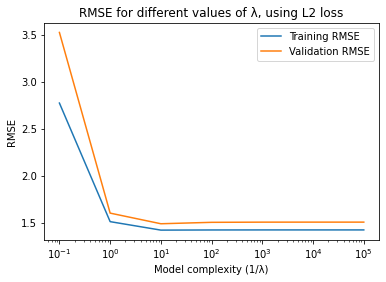

In [31]:
np.random.seed(2) #setting seed for result reproducability
initial_weights_l2 = np.random.normal(size = len(training_x.columns)+1) #initial weights randomly
max_iter_l2 = 100 #max no of iterations for gradient descent
epsilon_l2 = 1e-3 #epsilon for gradient descent
lr_l2 = 0.1 #learning rate for gradient descent
lamda_vals_l2 = np.logspace(-5,1,num=7) #we will see model performance for these 7 values of lamda

#initializing zero arrays to assign values later
w_final_l2 = np.zeros((len(lamda_vals_l2), np.size(initial_weights_l2))) 
train_loss_final_l2 = np.zeros(len(lamda_vals_l2))
validation_loss_final_l2 = np.zeros(len(lamda_vals_l2))
validation_NRMSE_l2 = np.zeros(len(lamda_vals_l2))
training_RMSE_l2 = np.zeros(len(lamda_vals_l2))
validation_RMSE_l2 = np.zeros(len(lamda_vals_l2))

for i in range(len(lamda_vals_l2)): #running gradient descent for each value of lamda
  w_final_l2[i], train_loss_final_l2[i], validation_loss_final_l2[i], validation_NRMSE_l2[i] = Gradient_Descent(np.squeeze(training_x), np.squeeze(validation_x), np.squeeze(training_y), np.squeeze(validation_y), initial_weights_l2, lamda_vals_l2[i], max_iter_l2, epsilon_l2, lr_l2, L2_Loss, L2_Gradient) #running gradient descent
  training_RMSE_l2[i] = np.sqrt(MSE_Loss(np.squeeze(training_x), np.squeeze(training_y), w_final_l2[i])) #the RMSE on training data after running gradient descent for given lamda
  validation_RMSE_l2[i] = np.sqrt(MSE_Loss(np.squeeze(validation_x), np.squeeze(validation_y), w_final_l2[i])) #the RMSE on validation data after running gradient descent for given lamda

#Plotting Training and Validation RMSE vs 1/lamda
plt.xscale('log')
plt.ylabel('RMSE')
plt.xlabel('Model complexity (1/\u03BB)')
plt.plot(1/lamda_vals_l2, training_RMSE_l2, label = "Training RMSE")
plt.plot(1/lamda_vals_l2, validation_RMSE_l2, label = "Validation RMSE")
plt.legend(loc = "upper right")
plt.title("RMSE for different values of \u03BB, using L2 loss")

In [32]:
print("Validation NRMSE values for different \u03BBs:")
for i in range(len(lamda_vals_l2)):
  print(str(lamda_vals_l2[i]) + ': ' + str(validation_NRMSE_l2[i]))

Validation NRMSE values for different λs:
1e-05: 0.39449545798083163
0.0001: 0.39449028368528105
0.001: 0.394438657971351
0.01: 0.39393404772022783
0.1: 0.38997750208942167
1.0: 0.41956962479399507
10.0: 0.922342939039209


We can see that the lowest RMSE is given by the model corresponding to λ = 0.01. So, we will choose this value of λ. For this value of λ:

In [33]:
print('Best value of \u03BB='+str(lamda_vals_l2[4])+'.')
print('Weights:', end=' ')
print(w_final_l2[4])
print('Validation RMSE: '+str(validation_RMSE_l2[4]))
print('Validation NRMSE: '+str(validation_NRMSE_l2[4]))

Best value of λ=0.1.
Weights: [ 3.19514078e-01  4.31430227e-02  4.04635267e-02 -6.08070253e-02
  1.36443614e+00  6.50284470e-01 -3.41778634e-01  3.01898389e-01
 -4.86175932e-01 -1.06517780e-01 -2.31309558e-01 -2.72247570e-01
 -6.87339259e-02  2.43773117e-01  3.42032582e-03  4.65091838e-03
 -5.86379185e-02 -9.03141573e-02 -2.72423219e-01  3.09026755e-01
  1.60099819e-01  3.02008555e+01]
Validation RMSE: 1.490464838940134
Validation NRMSE: 0.38997750208942167


#**Finding a good model using L1 Loss**

Text(0.5, 1.0, 'RMSE for different values of λ, using L1 loss')

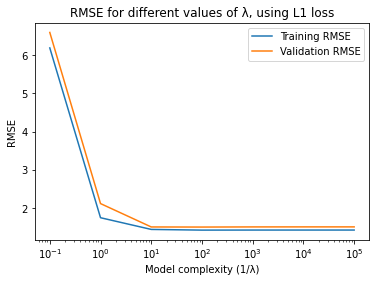

In [34]:
np.random.seed(2) #setting seed for result reproducability
initial_weights_l1 = np.random.normal(size = len(training_x.columns)+1) #initial weights randomly
max_iter_l1 = 100 #max no of iterations for gradient descent
epsilon_l1 = 1e-3 #epsilon for gradient descent
lr_l1 = 0.1 #learning rate for gradient descent
lamda_vals_l1 = np.logspace(-5,1,num=7) #we will see model performance for these 7 values of lamda

#initializing zero arrays to assign values later
w_final_l1 = np.zeros((len(lamda_vals_l1), np.size(initial_weights_l1))) 
train_loss_final_l1 = np.zeros(len(lamda_vals_l1))
validation_loss_final_l1 = np.zeros(len(lamda_vals_l1))
validation_NRMSE_l1 = np.zeros(len(lamda_vals_l1))
training_RMSE_l1 = np.zeros(len(lamda_vals_l1))
validation_RMSE_l1 = np.zeros(len(lamda_vals_l1))

for i in range(len(lamda_vals_l1)): #running gradient descent for each value of lamda
  w_final_l1[i], train_loss_final_l1[i], validation_loss_final_l1[i], validation_NRMSE_l1[i] = Gradient_Descent(np.squeeze(training_x), np.squeeze(validation_x), np.squeeze(training_y), np.squeeze(validation_y), initial_weights_l1, lamda_vals_l1[i], max_iter_l1, epsilon_l1, lr_l1, L1_Loss, L1_Gradient) #running gradient descent
  training_RMSE_l1[i] = np.sqrt(MSE_Loss(np.squeeze(training_x), np.squeeze(training_y), w_final_l1[i])) #the RMSE on training data after running gradient descent for given lamda
  validation_RMSE_l1[i] = np.sqrt(MSE_Loss(np.squeeze(validation_x), np.squeeze(validation_y), w_final_l1[i])) #the RMSE on validation data after running gradient descent for given lamda

#Plotting Training and Validation RMSE vs 1/lamda
plt.xscale('log')
plt.ylabel('RMSE')
plt.xlabel('Model complexity (1/\u03BB)')
plt.plot(1/lamda_vals_l1, training_RMSE_l1, label = "Training RMSE")
plt.plot(1/lamda_vals_l1, validation_RMSE_l1, label = "Validation RMSE")
plt.legend(loc = "upper right")
plt.title("RMSE for different values of \u03BB, using L1 loss")

In [35]:
print("Validation NRMSE values for different \u03BBs:")
for i in range(len(lamda_vals_l1)):
  print(str(lamda_vals_l1[i]) + ': ' + str(validation_NRMSE_l1[i]))

Validation NRMSE values for different λs:
1e-05: 0.39449369267370943
0.0001: 0.3944726367635177
0.001: 0.39426669702198625
0.01: 0.3933021505741234
0.1: 0.3939937539113547
1.0: 0.5539965598015251
10.0: 1.7256757408442214


We can see that the lowest RMSE is given by the model corresponding to λ = 0.01. So, we will choose this value of λ. For this value of λ:

In [36]:
print('Best value of \u03BB='+str(lamda_vals_l1[3])+'.')
print('Weights:', end=' ')
print(w_final_l1[3])
print('Validation RMSE: '+str(validation_RMSE_l1[3]))
print('Validation NRMSE: '+str(validation_NRMSE_l1[3]))

Best value of λ=0.01.
Weights: [ 2.87636827e-01  2.18612095e-03  2.48335544e-02 -4.91309089e-02
  1.40059506e+00  7.06845618e-01 -3.37509887e-01  3.19754602e-01
 -5.30284234e-01 -6.17885636e-02 -2.19724036e-01 -2.70531503e-01
 -5.87773000e-02  2.46316307e-01 -5.16888132e-04  1.15447920e-03
 -5.68326540e-02 -9.38882608e-02 -2.97981738e-01  3.38081913e-01
  1.59566944e-01  3.01984984e+01]
Validation RMSE: 1.503171396733171
Validation NRMSE: 0.3933021505741234


#**Finding a good model using Pseudo-inverse method**

Text(0.5, 1.0, 'RMSE for different values of λ, using Pseudo-inverse method')

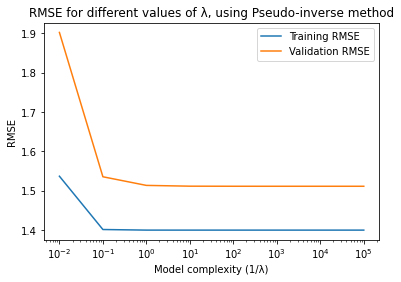

In [37]:
np.random.seed(2)
lamda_vals_pi = np.logspace(-5,2,num=8) #we will see model performance for these 8 values of lamda

#initializing zero arrays to assign values later
w_final_pi = np.zeros((len(lamda_vals_pi), len(training_x.columns)+1)) 
training_RMSE_pi = np.zeros(len(lamda_vals_pi))
validation_RMSE_pi = np.zeros(len(lamda_vals_pi))
validation_NRMSE_pi = np.zeros(len(lamda_vals_pi))

for i in range(len(lamda_vals_pi)):
  w_final_pi[i] = Pseudo_Inverse(np.squeeze(training_x), np.squeeze(training_y), lamda_vals_pi[i]) #Running Pseudo-inverse method to find the weights
  training_RMSE_pi[i] = np.sqrt(MSE_Loss(np.squeeze(training_x), np.squeeze(training_y), w_final_pi[i])) #the RMSE on training data after finding weights for given lamda
  validation_RMSE_pi[i] = np.sqrt(MSE_Loss(np.squeeze(validation_x), np.squeeze(validation_y), w_final_pi[i])) #the RMSE on validation data after finding weights for given lamda
  validation_NRMSE_pi[i] = NRMSE_Metric(np.squeeze(validation_x), np.squeeze(validation_y), w_final_pi[i]) #the NRMSE on validation data after finding weights for given lamda

#Plotting Training and Validation RMSE vs 1/lamda
plt.xscale('log')
plt.ylabel('RMSE')
plt.xlabel('Model complexity (1/\u03BB)')
plt.plot(1/lamda_vals_pi, training_RMSE_pi, label = "Training RMSE")
plt.plot(1/lamda_vals_pi, validation_RMSE_pi, label = "Validation RMSE")
plt.legend(loc = "upper right")
plt.title("RMSE for different values of \u03BB, using Pseudo-inverse method")

In [38]:
print("Validation NRMSE values for different \u03BBs:")
for i in range(len(lamda_vals_pi)):
  print(str(lamda_vals_pi[i]) + ': ' + str(validation_NRMSE_pi[i]))

Validation NRMSE values for different λs:
1e-05: 0.39531720448234065
0.0001: 0.3953172560633406
0.001: 0.39531777187869677
0.01: 0.3953229305680796
0.1: 0.3953745710300967
1.0: 0.3958963181439654
10.0: 0.40163368843953345
100.0: 0.4976282907398535


We can see that the lowest RMSE is given by the model corresponding to λ = 1e-5. So, we will choose this value of λ. For this value of λ:

In [39]:
print('Best value of \u03BB='+str(lamda_vals_pi[0])+'.')
print('Weights:', end=' ')
print(w_final_pi[0])
print('Validation RMSE: '+str(validation_RMSE_pi[0]))
print('Validation NRMSE: '+str(validation_NRMSE_pi[0]))

Best value of λ=1e-05.
Weights: [ 3.85714330e-01  6.80855958e-02  5.59280882e-01 -1.58964521e-01
  2.00892137e+00  1.28425959e-01 -3.39375087e-01  2.69498751e-01
 -4.13419708e-01 -1.24385312e-01 -2.00254290e-01 -3.37175170e-01
 -1.00295592e-01  2.35852817e-01 -2.23214284e-02  1.65449671e-02
 -8.76388285e-02 -1.10067513e-01 -2.50087148e-01  2.80686751e-01
  9.90943338e-02  3.02176023e+01]
Validation RMSE: 1.5108727820250798
Validation NRMSE: 0.39531720448234065


#**Observations and Conclusions**

We can see that using all three methods, we achieved very similar results in terms of NMRSE metric. The NRMSE is low, and the performance is hence satisfactory in all three cases. Also, we can see that on increasing model complexity, we are able to increase performance only uptil a certain point. This matches with the theory that we have been studying. The best model was obtained using L2 loss, and λ = 0.1. I will be using the model obtained using that for the subsequent parts.

#**Using the best model to predict the outputs on validation data**

R2 score is : 0.847917547864095


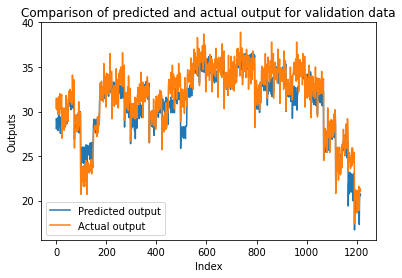

In [40]:
validation_prediction = Prediction(np.squeeze(validation_x), w_final_l2[4])
validation_actual = np.squeeze(validation_y)
index_arr = [i for i in range(len(validation_actual))]
plt.xlabel('Index')
plt.ylabel('Outputs')
plt.plot(index_arr, validation_prediction, label = 'Predicted output')
plt.plot(index_arr, validation_actual, label = 'Actual output')
plt.title('Comparison of predicted and actual output for validation data')
plt.legend()

e = (validation_prediction-validation_actual)
e = np.sum(e*e) #squared sum of errors
var = validation_actual - np.mean(validation_actual)
var = np.sum(var*var) #variance of data
r2_score = 1-(e/var)
print("R2 score is : "+str(r2_score))


Obtained R2 score on validation data : 0.8479

(5.0, 50.0)

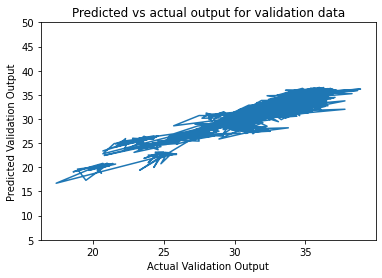

In [41]:
plt.plot(validation_actual, validation_prediction)
plt.xlabel('Actual Validation Output')
plt.ylabel('Predicted Validation Output')
plt.title('Predicted vs actual output for validation data')
plt.ylim(5,50)

We can see that it is roughly a straight line

#**Predicting the output for the Test Data**

In [42]:
test_prediction = Prediction(np.squeeze(testing_x), w_final_l2[4])
prediction_df = pd.DataFrame(test_prediction, columns = ['Next_Tmax'])
display(prediction_df)
#prediction_df.to_csv('190070007_190070047_1.csv', index=False)

,Next_Tmax
0,27.521430
1,29.537274
2,29.658612
3,29.560513
4,29.342156
...,...
1501,27.759233
1502,27.677126
1503,28.029658
1504,28.034394


#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 